In [1]:
## Taken from https://github.com/alberduris/SirajsCodingChallenges/tree/master/Stock%20Market%20Prediction


In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None

In [2]:
import os
print(os.getcwd())
os.chdir('C:\\Users\\G560667\\stock-trader\\')
print(os.getcwd())

\\inmbfp1\redirect1\G560667\My Documents
C:\Users\G560667\stock-trader


In [3]:
import tensorflow as tf
#from tensorflow.contrib import rnn
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
dataset = pd.read_csv('PNB_Processed.csv')
dataset.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
0,174.65,175.7,0.000000,0.0,3.85
1,175.70,176.0,0.011159,0.0,3.50


In [5]:
## Normalize

dataset = (dataset - dataset.mean()) / (dataset.max() - dataset.min())
dataset.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
0,-0.241750,-0.240945,0.000005,-0.469698,-0.021174
1,-0.240971,-0.240723,0.000058,-0.469698,-0.021577


In [6]:
##Hyper Params

In [26]:
num_epochs = 1000

batch_size = 1

total_series_length = len(dataset.index)

truncated_backprop_length = 3 #The size of the sequence

state_size = 12 #The number of neurons

num_features = 4
num_classes = 1 #[1,0]

num_batches = total_series_length//batch_size//truncated_backprop_length

min_test_size = 100

print('The total series length is: %d' %total_series_length)
print('The current configuration gives us %d batches of %d observations each one looking %d steps in the past' 
      %(num_batches,batch_size,truncated_backprop_length))

The total series length is: 3914
The current configuration gives us 1304 batches of 1 observations each one looking 3 steps in the past


In [8]:
## Train-Test split

In [10]:
datasetTrain = dataset[dataset.index < num_batches*batch_size*truncated_backprop_length]


for i in range(min_test_size,len(dataset.index)):
    
    if(i % truncated_backprop_length*batch_size == 0):
        test_first_idx = len(dataset.index)-i
        break

datasetTest =  dataset[dataset.index >= test_first_idx]

In [11]:
datasetTrain.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
0,-0.241750,-0.240945,0.000005,-0.469698,-0.021174
1,-0.240971,-0.240723,0.000058,-0.469698,-0.021577


In [12]:
datasetTest.head(2)

,Close,CloseTarget,MACD,Stochastics,ATR
3812,-0.338357,-0.338479,0.004893,0.383960,-0.024342
3813,-0.338505,-0.338479,0.004450,0.267144,-0.024917


In [13]:
xTrain = datasetTrain[['Close','MACD','Stochastics','ATR']].as_matrix()
yTrain = datasetTrain['CloseTarget'].as_matrix()

In [14]:
print(xTrain[0:3],'\n',yTrain[0:3])

[[ -2.41750159e-01   4.78017641e-06  -4.69698342e-01  -2.11742354e-02]
 [ -2.40971372e-01   5.84609944e-05  -4.69698342e-01  -2.15773451e-02]
 [ -2.40748862e-01   8.64988838e-05  -4.69698342e-01  -1.97345579e-02]] 
 [-0.24094536 -0.24072285 -0.24038909]


In [15]:
xTest = datasetTest[['Close','MACD','Stochastics','ATR']].as_matrix()
yTest = datasetTest['CloseTarget'].as_matrix()

In [16]:
print(xTest[0:3],'\n',yTest[0:3])

[[-0.33835687  0.0048926   0.38396019 -0.02434153]
 [-0.33850521  0.00444954  0.26714376 -0.0249174 ]
 [-0.33850521  0.00403073  0.0757562  -0.02462946]] 
 [-0.3384792  -0.3384792  -0.33814544]


In [18]:
##Visualize starting price data

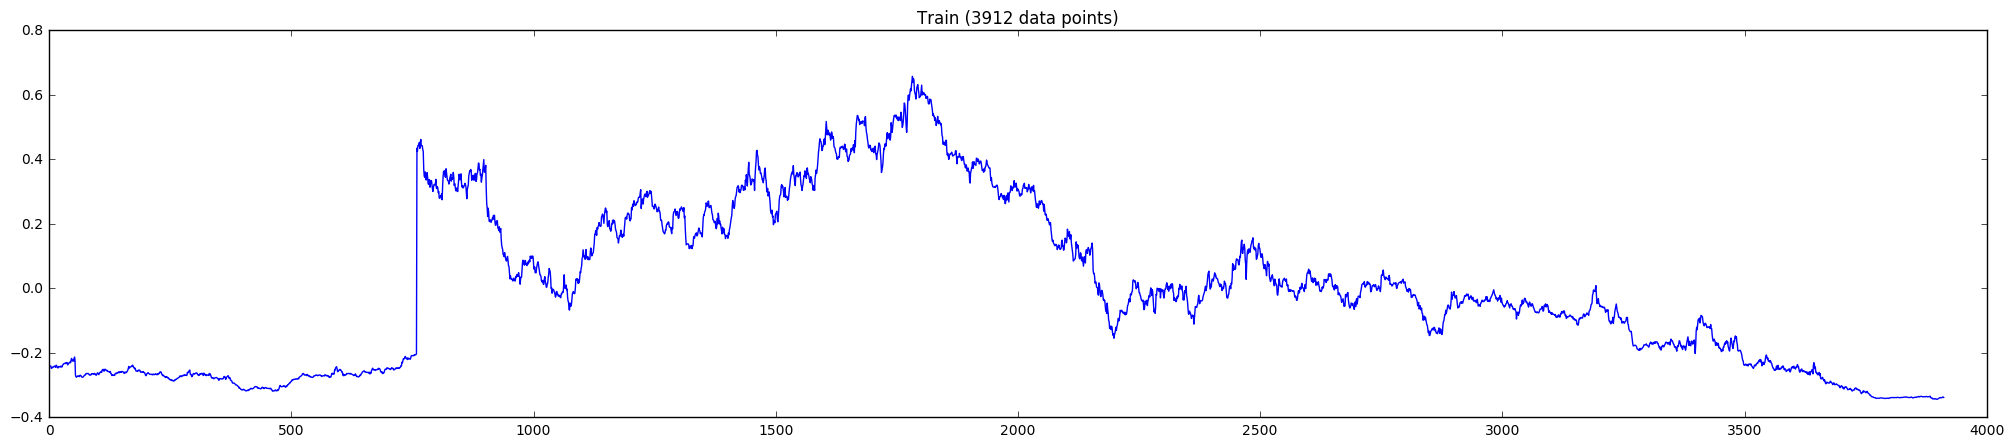

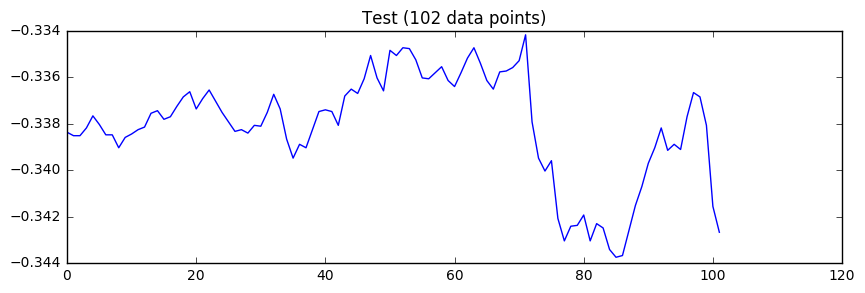

In [19]:
plt.figure(figsize=(25,5))
plt.plot(xTrain[:,0])
plt.title('Train (' +str(len(xTrain))+' data points)')
plt.show()
plt.figure(figsize=(10,3))
plt.plot(xTest[:,0])
plt.title('Test (' +str(len(xTest))+' data points)')
plt.show()

In [20]:
## Model

In [21]:
LEARNING_RATE = 0.001
BATCH_SIZE = 1

x = tf.placeholder(tf.float32,[None,num_features],name='x')
y = tf.placeholder(tf.float32,[None],name='y')
keep_prob = tf.placeholder(tf.float32,name='keep_prob')

In [22]:
#Layer1
WRelu1 = tf.Variable(tf.truncated_normal([num_features,num_features]),dtype=tf.float32,name='wrelu1')
bRelu1 = tf.Variable(tf.truncated_normal([num_features]),dtype=tf.float32,name='brelu1')
relu1 = tf.nn.elu(tf.matmul(x,WRelu1) + bRelu1,name='relu1')

#DROPOUT
relu1 = tf.nn.dropout(relu1,keep_prob=keep_prob,name='relu1drop')

#Layer2
WRelu2 = tf.Variable(tf.truncated_normal([num_features,num_features]),dtype=tf.float32,name='wrelu2')
bRelu2 = tf.Variable(tf.truncated_normal([num_features]),dtype=tf.float32,name='brelu2')
layer2 = tf.add(tf.add(tf.matmul(relu1,WRelu2),bRelu2),x,name='layer2')

relu2 = tf.nn.elu(layer2,name='relu2')

#Layer3
WRelu3 = tf.Variable(tf.truncated_normal([num_features,num_features]),dtype=tf.float32,name='wrelu3')
bRelu3 = tf.Variable(tf.truncated_normal([num_features]),dtype=tf.float32,name='brelu3')
relu3 = tf.nn.elu(tf.matmul(relu2,WRelu3) + bRelu3,name='relu3')


#DROPOUT
relu3 = tf.nn.dropout(relu3,keep_prob=keep_prob,name='relu3drop')

#Out layer
Wout = tf.Variable(tf.truncated_normal([num_features,1]),dtype=tf.float32,name='wout')
bout = tf.Variable(tf.truncated_normal([1]),dtype=tf.float32,name='bout')
logits = tf.add(tf.matmul(relu3,Wout),bout,name='logits')


#Predictions
pred = logits

#Cost & Optimizer
cost = tf.reduce_mean(tf.squared_difference(y, logits))
optimizer = tf.train.AdamOptimizer(LEARNING_RATE).minimize(cost)

In [27]:
def train_one_classifier(num_epochs,label_n):
    display_freq = num_epochs//10

    loss_list = []
    loss_list_batch = []

    with tf.Session() as sess:
        tf.global_variables_initializer().run()

        for step in range(num_epochs):
            print('Step: %d' %step)

            for batch_idx in range(num_batches):
                
                batchx = xTrain[batch_idx*BATCH_SIZE:batch_idx*BATCH_SIZE+BATCH_SIZE,:]
                batchy = yTrain[batch_idx*BATCH_SIZE:batch_idx*BATCH_SIZE+BATCH_SIZE].ravel()

                feed = {x: batchx, y: batchy, keep_prob:0.5}
                
                _,_loss = sess.run([optimizer,cost], feed_dict=feed)
                loss_list_batch.append(np.average(_loss)) #Store av. batch loss

            #Add the av. loss of the batch to the loss list
            loss_list.append(np.average(loss_list_batch))
            loss_list_batch = []
                        
            if(step%2 == 0):
                print('Initial loss: %.3f' % np.average(_loss))


        
        feed_dev = {x : xTest, y : yTest.ravel(), keep_prob:1}
        _y,_softmax,_pred = sess.run([y,logits,pred],feed_dict=feed_dev)
        
        print('Train finished - Final loss: %.3f' % (np.average(_loss)))
        
        
    return loss_list,_y,_pred

In [ ]:
loss_list,_y,_pred = train_one_classifier(num_epochs,1)

Step: 0
Initial loss: 0.001
Step: 1
Step: 2
Initial loss: 0.162
Step: 3
Step: 4
Initial loss: 0.001
Step: 5
Step: 6
Initial loss: 0.001
Step: 7
Step: 8
Initial loss: 0.005
Step: 9
Step: 10
Initial loss: 0.032
Step: 11
Step: 12
Initial loss: 0.002
Step: 13
Step: 14
Initial loss: 0.000
Step: 15
Step: 16
Initial loss: 0.001
Step: 17
Step: 18
Initial loss: 0.000
Step: 19
Step: 20
Initial loss: 0.012
Step: 21
Step: 22
Initial loss: 0.000
Step: 23
Step: 24
Initial loss: 0.014
Step: 25
Step: 26
Initial loss: 0.011
Step: 27
Step: 28
Initial loss: 0.014
Step: 29
Step: 30
Initial loss: 0.011
Step: 31
Step: 32
Initial loss: 0.000
Step: 33
Step: 34
Initial loss: 0.002
Step: 35
Step: 36
Initial loss: 0.006
Step: 37
Step: 38
Initial loss: 0.013
Step: 39
Step: 40
Initial loss: 0.004
Step: 41
Step: 42
Initial loss: 0.013
Step: 43
Step: 44
Initial loss: 0.015
Step: 45
Step: 46
Initial loss: 0.003
Step: 47
Step: 48
Initial loss: 0.015
Step: 49
Step: 50
Initial loss: 0.003
Step: 51
Step: 52
Initial loss:

NameError: name 'loss_list' is not defined

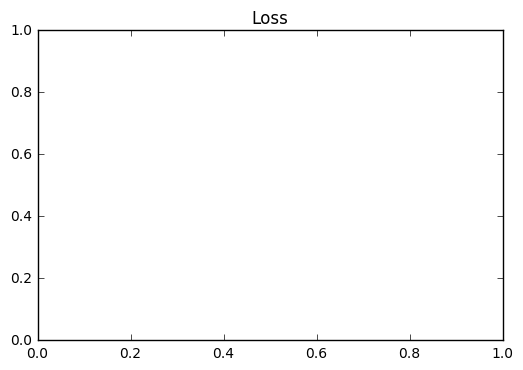

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Loss')
plt.scatter(x=np.arange(0,len(loss_list)),y=loss_list)
plt.xlabel('epochs')
plt.ylabel('loss')
plt.show();